<a href="https://colab.research.google.com/github/genesispah/Colab_actividad/blob/main/pandas_actividad_alturas_alumnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDAD


Tenemos una tabla con la altura de los alumnos destacados en los 10 primeros puestos de Argentina y los países limítrofes, 3b - Pandas - data.csv, con las siguientes columnas:


id pais: identificados numérico del país

0 - 9: altura en cms de los alumnos, ordenado por ranking de alumnos destacados, siendo 0 la columna del primer puesto.

escuela: nombre de la escuela

Deseamos obtener información estadística sobre las alturas de los alumnos en puestos similares en los diferentes países, y para ello necesitamos:


explorar,

limpiar,

modelar,

analizar y

visualizar los datos.

In [1]:
import numpy as np
import pandas as pd

OBTENCION DE DATOS


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/clase34')

datos = pd.read_csv('3b - Pandas - data.csv')
datos

,id pais,0,1,2,3,4,5,6,7,8,9,escuela
0,1,"$164,36","$162,28","$160,36","$161,33","$161,00","$164,48","$159,38","$160,93","$157,43",164.48,los solecitos
1,2,"$161,96","$162,59","$157,77","$166,80","$155,63","$160,13","$159,43","$164,59","$164,40",160.13,el caracol
2,Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"$161,13","$157,33","$154,05","$158,95","$160,46","$163,69","$163,60","$158,83","$159,09",163.69,el elefantito
5,6,"$155,73","$154,88","$165,85","$158,47","$158,68","$156,24","$162,33","$155,15","$159,36",156.24,las ardillitas
6,1,"$164,36","$162,28","$160,36","$161,33","$161,00","$164,48","$159,38","$160,93","$157,43",164.48,los solecitos
7,2,"$161,96","$162,59","$157,77","$166,80","$155,63","$160,13","$159,43","$164,59","$164,40",160.13,el caracol


Lista de países


Nos proporcionan la siguiente lista para generar el dataframe:


    idpais	  país
    1	    Argentina
    2	    Chile
    5	    Uruguay
    6	    Paraguay


In [4]:
id_pais = 1,2,5,6
nombre_pais = ('Argentina', 'Chile', 'Uruguay', 'Paraguay')
paises = pd.DataFrame( data = nombre_pais, index = id_pais, columns = ['pais'])
paises

,pais
1,Argentina
2,Chile
5,Uruguay
6,Paraguay


Notamos que faltan algunos de los países limítrofes y decidimos agregar al dataframe los valores "Bolivia", con índice 3, y Brasil con índice 4.

    pandas.concat(nuevo_df, [ignore_index = True])

    ignore_index = True, asigna automáticamente los índices, ignorando los del dataframe que se añade.

In [5]:
p_faltantes = pd.DataFrame(data = ['Bolivia', 'Brasil'], index = [3,4] , columns = ['pais'])
p_faltantes
paises = pd.concat([paises,p_faltantes])
paises

,pais
1,Argentina
2,Chile
5,Uruguay
6,Paraguay
3,Bolivia
4,Brasil


EXPLORACION DE DATOS



In [6]:
# Explorar el tipo de dato de las columnas
print(datos.dtypes)

id pais     object
0           object
1           object
2           object
3           object
4           object
5           object
6           object
7           object
8           object
9          float64
escuela     object
dtype: object


In [7]:
# convertir a dato numerico


Exploremos las primeras filas de datos para saber con qué estamos lidiando:


In [8]:
print(datos.head())

  id pais        0        1        2        3        4        5        6  \
0       1  $164,36  $162,28  $160,36  $161,33  $161,00  $164,48  $159,38   
1       2  $161,96  $162,59  $157,77  $166,80  $155,63  $160,13  $159,43   
2  Brasil      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       4      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       5  $161,13  $157,33  $154,05  $158,95  $160,46  $163,69  $163,60   

         7        8       9        escuela  
0  $160,93  $157,43  164.48  los solecitos  
1  $164,59  $164,40  160.13     el caracol  
2      NaN      NaN     NaN            NaN  
3      NaN      NaN     NaN            NaN  
4  $158,83  $159,09  163.69  el elefantito  


Observaciones:


El formato de las columnas es incorrecto.

La columna id pais contiene un valor incorrecto.

Hay una fila sin datos.

Hay una columna irrelevante.


Tareas:

Eliminar símbolos de $ (pues se trata de alturas).

Reemplazar las comas por puntos.

Eliminar:

la fila de Brasil.

la fila sin datos.

la columna innecesaria

 **LIMPIEZA DE DATOS **

1 y 2. Eliminar símbolos de $ y cambiar comas por puntos

Con el método pandas.str.replace(), se pueden eliminar los caracteres no deseados. str indica que vamos a tratar a los elementos de la columna con métodos de str.

Para trabajar sobre una sola columna, usaríamos lo siguiente:                                                             
    df[columna].str.replace(cambiar, por_nuevo_valor),

pero ¿cómo lo hacemos sobre todas las columnas simultáneamente?

In [9]:
# ¿cuáles son las columnas? Podemos ver que los $ se encuentran en las columnas 0 a 8
# Las cargamos en una lista
columnas = list(datos.columns[1:10])
columnas

['0', '1', '2', '3', '4', '5', '6', '7', '8']

In [10]:
# Utilizamos un bucle para aplicar los métodos de reemplazo que podamos
for col in columnas:
  datos[col] = datos[col].str.replace('$' , '')
  datos[col] = datos[col].str.replace(',' , '.')

datos


,id pais,0,1,2,3,4,5,6,7,8,9,escuela
0,1,164.36,162.28,160.36,161.33,161.00,164.48,159.38,160.93,157.43,164.48,los solecitos
1,2,161.96,162.59,157.77,166.80,155.63,160.13,159.43,164.59,164.40,160.13,el caracol
2,Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,161.13,157.33,154.05,158.95,160.46,163.69,163.60,158.83,159.09,163.69,el elefantito
5,6,155.73,154.88,165.85,158.47,158.68,156.24,162.33,155.15,159.36,156.24,las ardillitas
6,1,164.36,162.28,160.36,161.33,161.00,164.48,159.38,160.93,157.43,164.48,los solecitos
7,2,161.96,162.59,157.77,166.80,155.63,160.13,159.43,164.59,164.40,160.13,el caracol


**3. Eliminar filas y columnas no deseadas**

 Podemos ver que nos apresuramos demasiado al agregar Brasil y Bolivia, pues no hay datos.

 Además, notamos que hay registros repetidos en la tabla.

Para eliminar filas o columnas, utilizamos el método Dataframe.drop( ** kwargs).

Las filas que vamos a eliminar tienen índices 2 y 3, y además queremos que este cambio afecte al dataframe original (atributo inplace).

La sintaxis sería: Dataframe.drop([lista de filas], inplace = True).

In [11]:
datos.drop([2,3], inplace = True)
datos

,id pais,0,1,2,3,4,5,6,7,8,9,escuela
0,1,164.36,162.28,160.36,161.33,161.00,164.48,159.38,160.93,157.43,164.48,los solecitos
1,2,161.96,162.59,157.77,166.80,155.63,160.13,159.43,164.59,164.40,160.13,el caracol
4,5,161.13,157.33,154.05,158.95,160.46,163.69,163.60,158.83,159.09,163.69,el elefantito
5,6,155.73,154.88,165.85,158.47,158.68,156.24,162.33,155.15,159.36,156.24,las ardillitas
6,1,164.36,162.28,160.36,161.33,161.00,164.48,159.38,160.93,157.43,164.48,los solecitos
7,2,161.96,162.59,157.77,166.80,155.63,160.13,159.43,164.59,164.40,160.13,el caracol


En el caso de las columnas, debemos indicar la columna que queremos eliminar, y si queremos que se modifique el dataframe original.

La sintaxis sería: Dataframe.drop(columns = df[rango], inplace = True)

In [12]:
datos.drop(columns = datos[['escuela']], inplace = True)
datos

,id pais,0,1,2,3,4,5,6,7,8,9
0,1,164.36,162.28,160.36,161.33,161.00,164.48,159.38,160.93,157.43,164.48
1,2,161.96,162.59,157.77,166.80,155.63,160.13,159.43,164.59,164.40,160.13
4,5,161.13,157.33,154.05,158.95,160.46,163.69,163.60,158.83,159.09,163.69
5,6,155.73,154.88,165.85,158.47,158.68,156.24,162.33,155.15,159.36,156.24
6,1,164.36,162.28,160.36,161.33,161.00,164.48,159.38,160.93,157.43,164.48
7,2,161.96,162.59,157.77,166.80,155.63,160.13,159.43,164.59,164.40,160.13


Valores duplicados


En nuestro ejemplo, podemos detectar las filas de duplicados a simple vista, pero con dataframes más extensos podemos implementar el siguiente procedimiento:


1 - Averiguar cuántos registros duplicados hay.

2 - Identificar cuáles son, utilizando, por ejemplo, los id repetidos.

3 - Verificar

4 - Eliminar

In [13]:
datos.duplicated().sum()


2

In [14]:
# 2. Identificarlos, cargando los id de país duplicados en una lista
export_dups = datos[datos['id pais'].duplicated(keep = False)]['id pais'].tolist()

'''
keep: determina qué valores marcar como repetidos
- first: las repeticiones, excepto la primera.
- last: las repeticiones, excepto la última.
- False: considera todas las repeticiones
'''

export_dups


['1', '2', '1', '2']

In [15]:
# 3. Verificar
print(datos[datos.iloc[:].duplicated(keep=False)])

  id pais       0       1       2       3       4       5       6       7  \
0       1  164.36  162.28  160.36  161.33  161.00  164.48  159.38  160.93   
1       2  161.96  162.59  157.77  166.80  155.63  160.13  159.43  164.59   
6       1  164.36  162.28  160.36  161.33  161.00  164.48  159.38  160.93   
7       2  161.96  162.59  157.77  166.80  155.63  160.13  159.43  164.59   

        8       9  
0  157.43  164.48  
1  164.40  160.13  
6  157.43  164.48  
7  164.40  160.13  


In [16]:
# 4. Eliminar los registros duplicados
print(len(datos))
datos.drop_duplicates(inplace = True)
print(len(datos))
datos

6
4


,id pais,0,1,2,3,4,5,6,7,8,9
0,1,164.36,162.28,160.36,161.33,161.00,164.48,159.38,160.93,157.43,164.48
1,2,161.96,162.59,157.77,166.80,155.63,160.13,159.43,164.59,164.40,160.13
4,5,161.13,157.33,154.05,158.95,160.46,163.69,163.60,158.83,159.09,163.69
5,6,155.73,154.88,165.85,158.47,158.68,156.24,162.33,155.15,159.36,156.24


**Explorar el resultado**

In [17]:
datos.dtypes


id pais     object
0           object
1           object
2           object
3           object
4           object
5           object
6           object
7           object
8           object
9          float64
dtype: object

Queda convertir los tipos de datos con el método Dataframe.astype():

id pais a int


0 a 9 a float

In [18]:
print(columnas)
for col in columnas:
  datos[col] = datos[col].astype(float)

datos['id pais'] = datos['id pais'].astype(int)
print(datos.dtypes)

['0', '1', '2', '3', '4', '5', '6', '7', '8']
id pais      int64
0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
dtype: object


**MODELADO DE DATOS**

Empezamos a crear el modelo de datos que necesitamos para trabajar.

 Necesitamos:

que las columnas de datos reflejen el puesto del alumno

unificar la tabla de datos con la de países


**Cambiar el nombre de las columnas**

In [19]:
datos.rename(columns = {'0':'Puesto 1','1':'Puesto 2','2':'Puesto 3','3':'Puesto 4','4':'Puesto 5','5':'Puesto 6','6':'Puesto 7','7':'Puesto 8','8':'Puesto 9','9':'Puesto 10'}, inplace = True)
datos

,id pais,Puesto 1,Puesto 2,Puesto 3,Puesto 4,Puesto 5,Puesto 6,Puesto 7,Puesto 8,Puesto 9,Puesto 10
0,1,164.36,162.28,160.36,161.33,161.00,164.48,159.38,160.93,157.43,164.48
1,2,161.96,162.59,157.77,166.80,155.63,160.13,159.43,164.59,164.40,160.13
4,5,161.13,157.33,154.05,158.95,160.46,163.69,163.60,158.83,159.09,163.69
5,6,155.73,154.88,165.85,158.47,158.68,156.24,162.33,155.15,159.36,156.24


Deseamos reemplazar la columna con los id de los países por una con los nombres de los países.


¿Cómo unificar dos dataframes?


Con el método Dataframe.merge(), que respeta la lógica de los joins de SQL:


atributo how: ‘left’, ‘right’, ‘outer’, ‘inner’ (default), ‘cross’

atributo on: columna, lista o índice por los que se va a realizar el join
Ejemplo:

    df1 = pd.DataFrame({'Apellido': ['Juárez', 'Pérez', 'Gómez'], 'Valores': [10, 45, 33]})
    df2 = pd.DataFrame({'Apellido': ['Rodríguez', 'Gómez', 'Juárez'], 'Valores': [22, 15, 50]})
    df1.merge(df2, how='inner', on='Apellido')

      Apellido  Valores_x  Valores_y
    0   Juárez         10         50
    1    Gómez         33         15

Necesitamos obtener una columna en el dataframe de países que tenga el mismo nombre que el dataframe de datos: id pais.

        país
    1  Argentina
    2  Chile
    5  Uruguay
    6  Paraguay
    3  Bolivia
    4  Brasil

El método `Dataframe.reset_index()` nos permite efectuar esta operación.
Sintaxis: `df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')`

- level: por defecto el método restablece todos los índices del objeto, pero en el caso de los índices múltiples es posible indicar mediante esta propiedad aquellos que serán restablecidos.
- drop: indica si el índice que se convierte en una columna o si este es eliminado, por defecto el valor es falso, esto es, los valores del índice se convertirán en una columna.
- inplace: la propiedad indica si el método aplica las modificaciones al propio objeto o devuelve una copia modificada del mismo, por defecto el valor es falso, por lo que se obtiene una copia modificada.

In [20]:
# RESET DE LOS INDICES
print(paises)
print()
paises.reset_index(inplace= True)
print(paises)

        pais
1  Argentina
2      Chile
5    Uruguay
6   Paraguay
3    Bolivia
4     Brasil

   index       pais
0      1  Argentina
1      2      Chile
2      5    Uruguay
3      6   Paraguay
4      3    Bolivia
5      4     Brasil


In [21]:
# CAMBBIAR EL NOMBRE DE LA COLUMNA INDEX
paises.rename(columns = {'index':'id pais'}, inplace = True)
print(paises)

   id pais       pais
0        1  Argentina
1        2      Chile
2        5    Uruguay
3        6   Paraguay
4        3    Bolivia
5        4     Brasil


In [22]:
datos.dtypes

id pais        int64
Puesto 1     float64
Puesto 2     float64
Puesto 3     float64
Puesto 4     float64
Puesto 5     float64
Puesto 6     float64
Puesto 7     float64
Puesto 8     float64
Puesto 9     float64
Puesto 10    float64
dtype: object

In [23]:
# UNIMOS LOS DATAFRAME
datos = datos.merge(paises, how = 'inner' , on = 'id pais')
datos

,id pais,Puesto 1,Puesto 2,Puesto 3,Puesto 4,Puesto 5,Puesto 6,Puesto 7,Puesto 8,Puesto 9,Puesto 10,pais
0,1,164.36,162.28,160.36,161.33,161.00,164.48,159.38,160.93,157.43,164.48,Argentina
1,2,161.96,162.59,157.77,166.80,155.63,160.13,159.43,164.59,164.40,160.13,Chile
2,5,161.13,157.33,154.05,158.95,160.46,163.69,163.60,158.83,159.09,163.69,Uruguay
3,6,155.73,154.88,165.85,158.47,158.68,156.24,162.33,155.15,159.36,156.24,Paraguay


ANÁLISIS DE LOS DATOS

Obtenemos un resumen estadístico con el método Dataframe.describe().

In [24]:
datos.describe()

,id pais,Puesto 1,Puesto 2,Puesto 3,Puesto 4,Puesto 5,Puesto 6,Puesto 7,Puesto 8,Puesto 9,Puesto 10
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,3.500000,160.795000,159.270000,159.507500,161.387500,158.942500,161.135000,161.185000,159.875000,160.070000,161.135000
std,2.380476,3.643849,3.791139,4.958403,3.818886,2.420584,3.772183,2.119851,3.948075,3.010149,3.772183
min,1.000000,155.730000,154.880000,154.050000,158.470000,155.630000,156.240000,159.380000,155.150000,157.430000,156.240000
25%,1.750000,159.780000,156.717500,156.840000,158.830000,157.917500,159.157500,159.417500,157.910000,158.675000,159.157500
50%,3.500000,161.545000,159.805000,159.065000,160.140000,159.570000,161.910000,160.880000,159.880000,159.225000,161.910000
75%,5.250000,162.560000,162.357500,161.732500,162.697500,160.595000,163.887500,162.647500,161.845000,160.620000,163.887500
max,6.000000,164.360000,162.590000,165.850000,166.800000,161.000000,164.480000,163.600000,164.590000,164.400000,164.480000


Observaciones preliminares

En todos los puestos se observa cercanía entre la mediana y el promedio, lo que indica que no hay alturas demasiado extremas en esta muestra.

Podemos obtener los rangos de altura más frecuentes para cada uno de los puestos:

In [25]:
filas = list(datos.columns[1:11])
columnas = ["Q1","Q3","IQR"]
q1 = []
q3 = []
iqr = []
for col in filas:
  q1.append(datos[col].quantile(.25))
  q3.append(datos[col].quantile(.75))
  iqr.append(datos[col].quantile(.75) - datos[col].quantile(.25))

df = pd.DataFrame(data = np.transpose(np.array([q1,q3,iqr])), index = np.array(filas), columns = np.array(columnas))

print("Encontramos el 50% de los valores que más se repiten en el rango entre Q1 y Q3.\nLa diferencia entre estos valores se ve en la columna IQR.")
display(df)


Encontramos el 50% de los valores que más se repiten en el rango entre Q1 y Q3.
La diferencia entre estos valores se ve en la columna IQR.


,Q1,Q3,IQR
Puesto 1,159.7800,162.5600,2.7800
Puesto 2,156.7175,162.3575,5.6400
Puesto 3,156.8400,161.7325,4.8925
Puesto 4,158.8300,162.6975,3.8675
Puesto 5,157.9175,160.5950,2.6775
Puesto 6,159.1575,163.8875,4.7300
Puesto 7,159.4175,162.6475,3.2300
Puesto 8,157.9100,161.8450,3.9350
Puesto 9,158.6750,160.6200,1.9450
Puesto 10,159.1575,163.8875,4.7300


Visualización

Debido a la escasez de datos (4 por columna), un histograma no sería la mejor opción para visualizar su distribución. Una gráfica de barras tampoco es una buena alternativa.

En su lugar, utilizaremos una gráfica de estimación de densidad kernel (KDE). Al igual que los histogramas, la altura de la gráfica indica la repitencia del dato pero, cuando los datos son escasos, nos brinda una mejor visualización gracias a la suavidad y continuidad de la gráfica.

Comparando:

<Axes: title={'center': 'Distribución Alturas Puesto 1 (histograma)'}, ylabel='Frequency'>

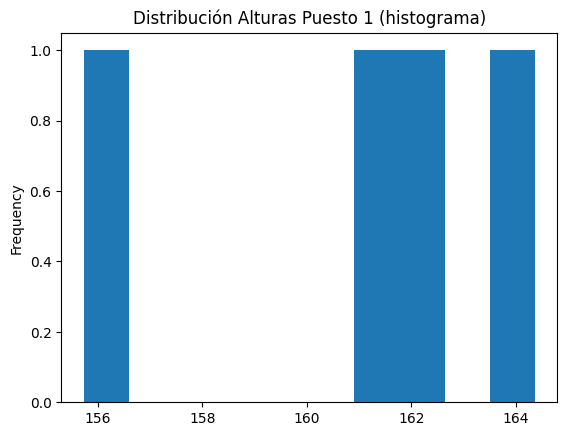

In [26]:
datos['Puesto 1'].plot.hist(title="Distribución Alturas Puesto 1 (histograma)")

<Axes: title={'center': 'Distribución Alturas Puesto 1 (KDE)'}, ylabel='Density'>

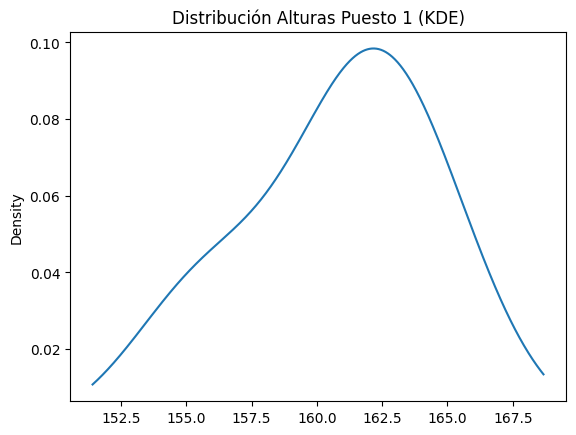

In [27]:
datos['Puesto 1'].plot.density(title="Distribución Alturas Puesto 1 (KDE)")

<Axes: title={'center': 'Distribución Alturas Puesto 2'}, ylabel='Density'>

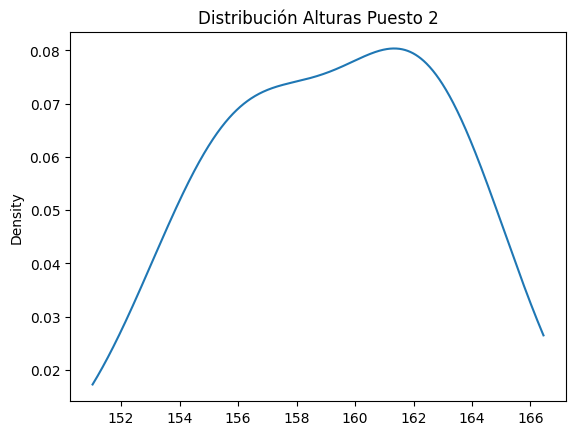

In [28]:
datos['Puesto 2'].plot.density(title="Distribución Alturas Puesto 2")

<Axes: title={'center': 'Distribución Alturas Puesto 3'}, ylabel='Density'>

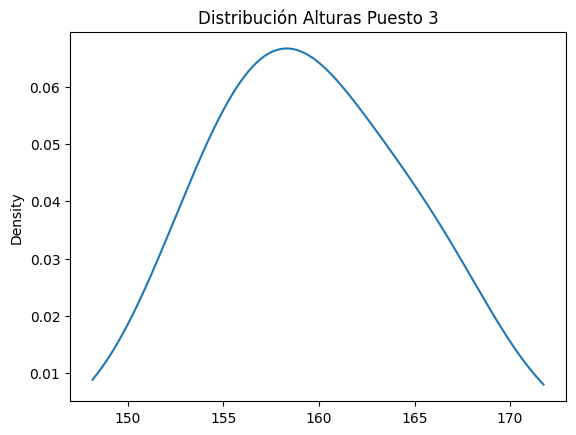

In [29]:
datos['Puesto 3'].plot.density(title="Distribución Alturas Puesto 3")

<Axes: title={'center': 'Distribución Alturas Puesto 4'}, ylabel='Density'>

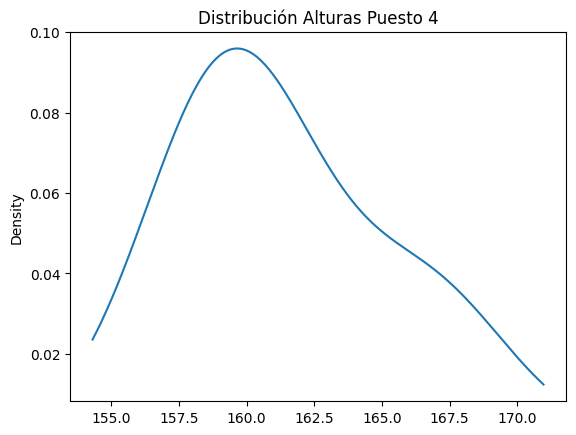

In [30]:
datos['Puesto 4'].plot.density(title="Distribución Alturas Puesto 4")

<Axes: title={'center': 'Distribución Alturas Puesto 5'}, ylabel='Density'>

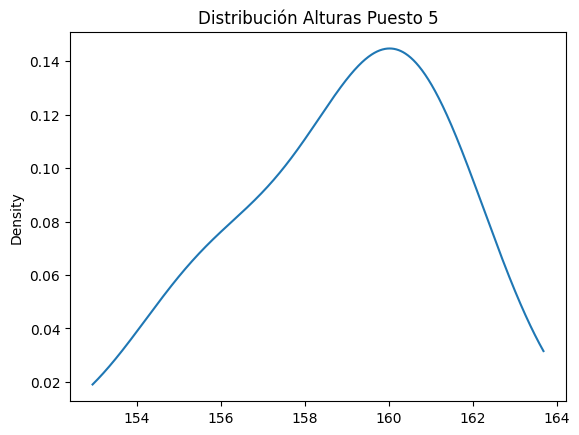

In [31]:
datos['Puesto 5'].plot.density(title="Distribución Alturas Puesto 5")

<Axes: title={'center': 'Distribución Alturas Puesto 6'}, ylabel='Density'>

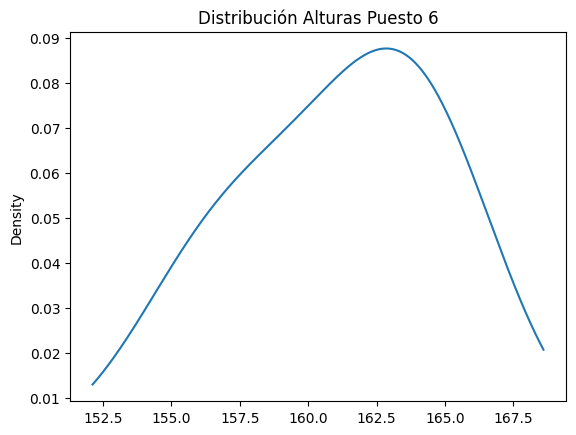

In [32]:
datos['Puesto 6'].plot.density(title="Distribución Alturas Puesto 6")

<Axes: title={'center': 'Distribución Alturas Puesto 7'}, ylabel='Density'>

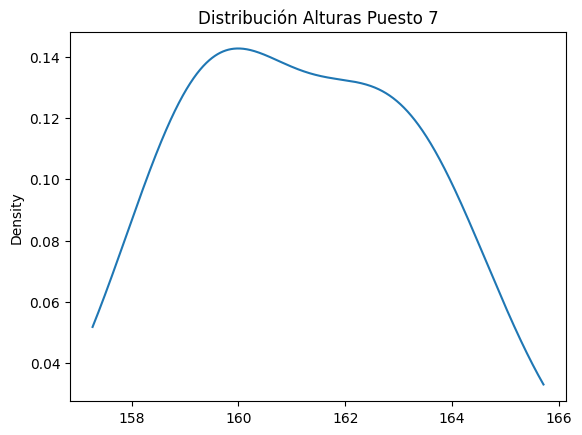

In [33]:
datos['Puesto 7'].plot.density(title="Distribución Alturas Puesto 7")

<Axes: title={'center': 'Distribución Alturas Puesto 8'}, ylabel='Density'>

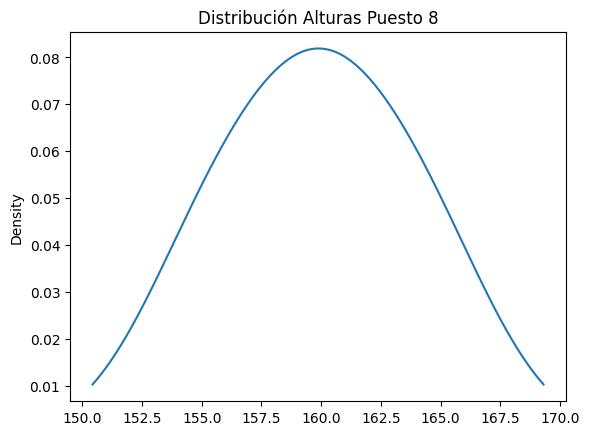

In [34]:
datos['Puesto 8'].plot.density(title="Distribución Alturas Puesto 8")

<Axes: title={'center': 'Distribución Alturas Puesto 9'}, ylabel='Density'>

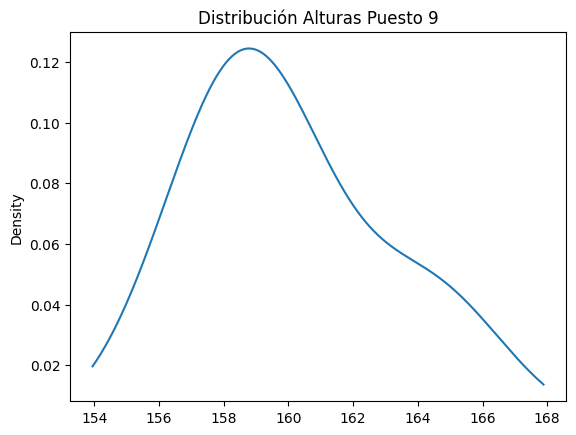

In [35]:
datos['Puesto 9'].plot.density(title="Distribución Alturas Puesto 9")

<Axes: title={'center': 'Distribución Alturas Puesto 10'}, ylabel='Density'>

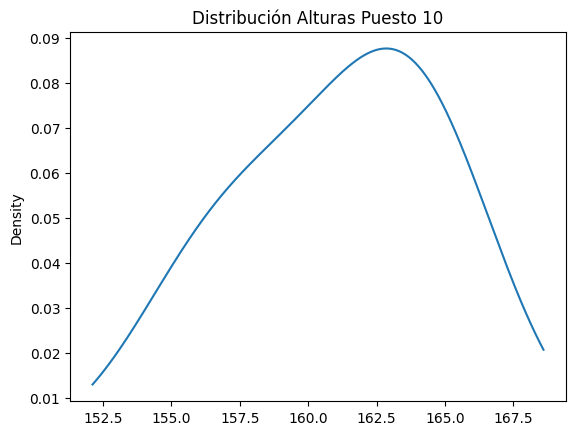

In [36]:
datos['Puesto 10'].plot.density(title="Distribución Alturas Puesto 10")